# Data exploration

## Step 0: Imports

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%pip install statsmodels
%pip install scikit-learn
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from sklearn.ensemble import RandomForestRegressor

from src.data.data_fetcher import get_all_features, get_raw_data
from src.features.feature_engineering import create_time_features_from_date

from src.visualization.statistical_distribution import analyze_normality
from src.visualization.plotting import detect_outliers, plot_moving_average


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Bruker\OneDrive\NTNU semester 05\TDT4173 Maskinlæring\ml_power_predictor\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\Users\Bruker\OneDrive\NTNU semester 05\TDT4173 Maskinlæring\ml_power_predictor\venv\Scripts\python.exe -m pip install --upgrade pip' command.


## Step 0.5: Reading data

In [9]:
targets_A, targets_B, targets_C, X_train_estimated_a, X_train_estimated_b, X_train_estimated_c, X_train_observed_a, X_train_observed_b, X_train_observed_c, X_test_estimated_a, X_test_estimated_b, X_test_estimated_c = get_raw_data()
all_features = get_raw_data()

Step 0.: Preprocessing


In [10]:
# Load the dataset for Location A
targets_A['time'] = pd.to_datetime(targets_A['time'])
targets_A.set_index('time', inplace=True)

targets_B['time'] = pd.to_datetime(targets_B['time'])
targets_B.set_index('time', inplace=True)

targets_C['time'] = pd.to_datetime(targets_C['time'])
targets_C.set_index('time', inplace=True)


# Step 1: Data Understanding

### Compute statistics for each location

In [11]:
# Compute statistics for each location
stats_A = targets_A['pv_measurement'].describe()
stats_B = targets_B['pv_measurement'].describe()
stats_C = targets_C['pv_measurement'].describe()
print("Statistics for Location A:\n", stats_A)
print("\nStatistics for Location B:\n", stats_B)
print("\nStatistics for Location C:\n", stats_C)

Statistics for Location A:
 count    34085.000000
mean       630.594707
std       1165.902422
min          0.000000
25%          0.000000
50%          5.940000
75%        678.040000
max       5733.420000
Name: pv_measurement, dtype: float64

Statistics for Location B:
 count    32844.000000
mean        96.824778
std        193.946487
min         -0.000000
25%         -0.000000
50%          0.000000
75%         96.600000
max       1152.300000
Name: pv_measurement, dtype: float64

Statistics for Location C:
 count    26095.000000
mean        77.631060
std        165.816877
min         -0.000000
25%          0.000000
50%          0.000000
75%         58.800000
max        999.600000
Name: pv_measurement, dtype: float64


## Trend Analysis
This code will plot the actual pv_measurement values along with their rolling mean trend (computed over a 7-day window) for Location A. The shaded region represents the confidence intervals for the moving average. You can repeat similar plots for Locations B and C by calling the plot_moving_average function with their respective datasets.

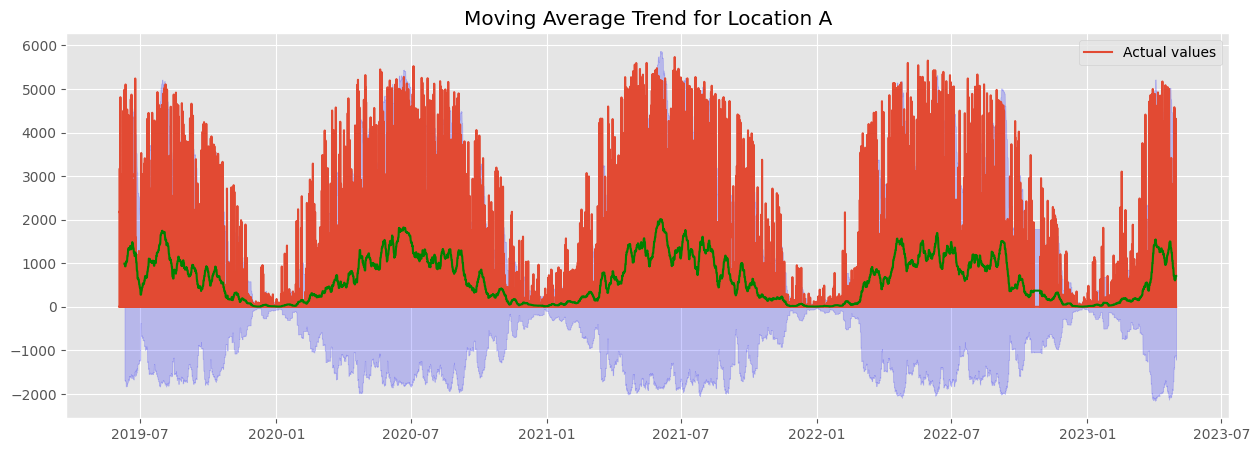

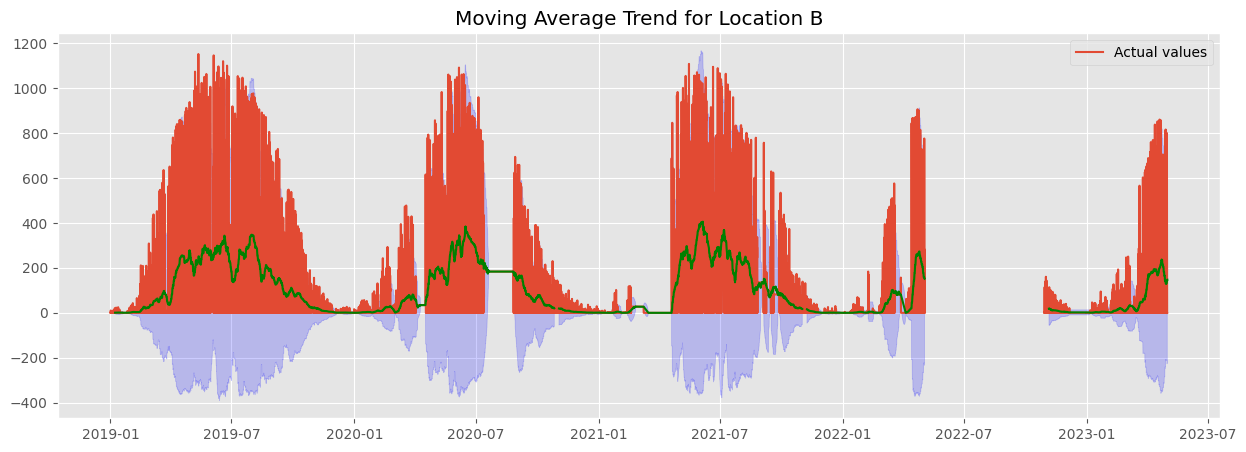

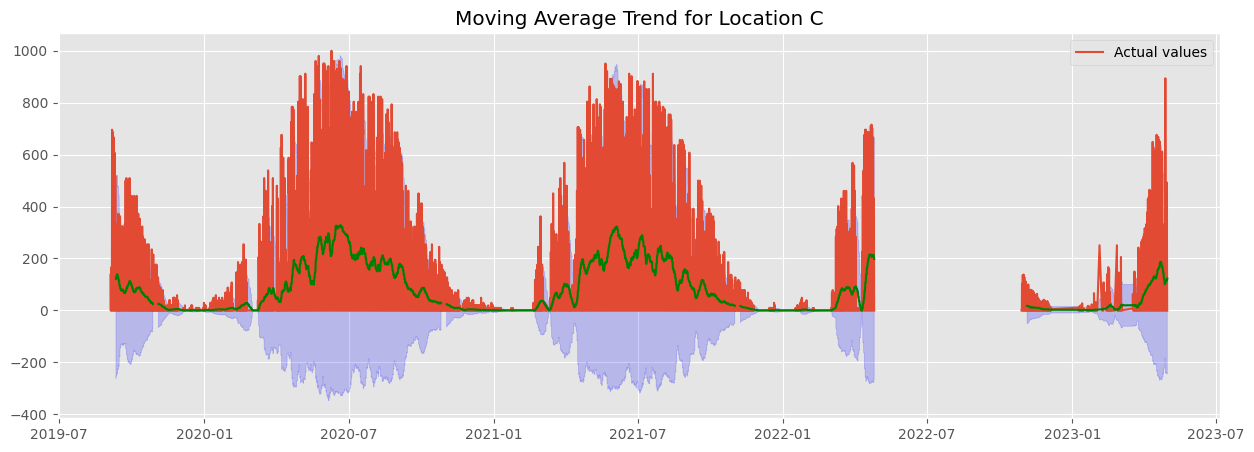

In [12]:
from src.visualization.plotting import plot_moving_average
# Compute moving averages for trend analysis for Location A, B and C
plot_moving_average(targets_A['pv_measurement'], window=24*7, plot_intervals=True, title="Moving Average Trend for Location A")
plot_moving_average(targets_B['pv_measurement'], window=24*7, plot_intervals=True, title="Moving Average Trend for Location B")
plot_moving_average(targets_C['pv_measurement'], window=24*7, plot_intervals=True, title="Moving Average Trend for Location C")

## Seasonality analysis
Identifying recurring patterns or cycles in the data. For hourly data, you might find daily or monthly seasonality.

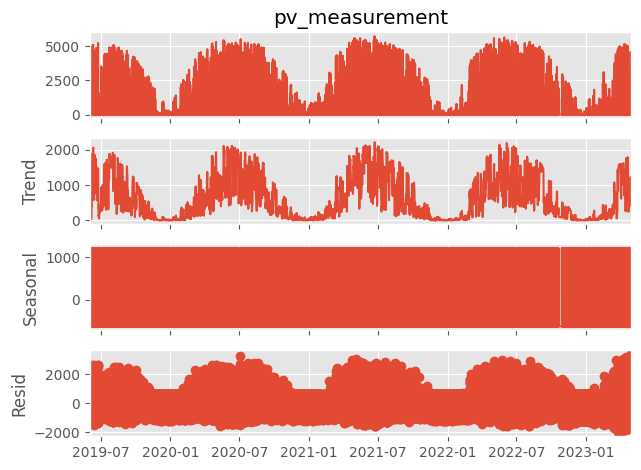

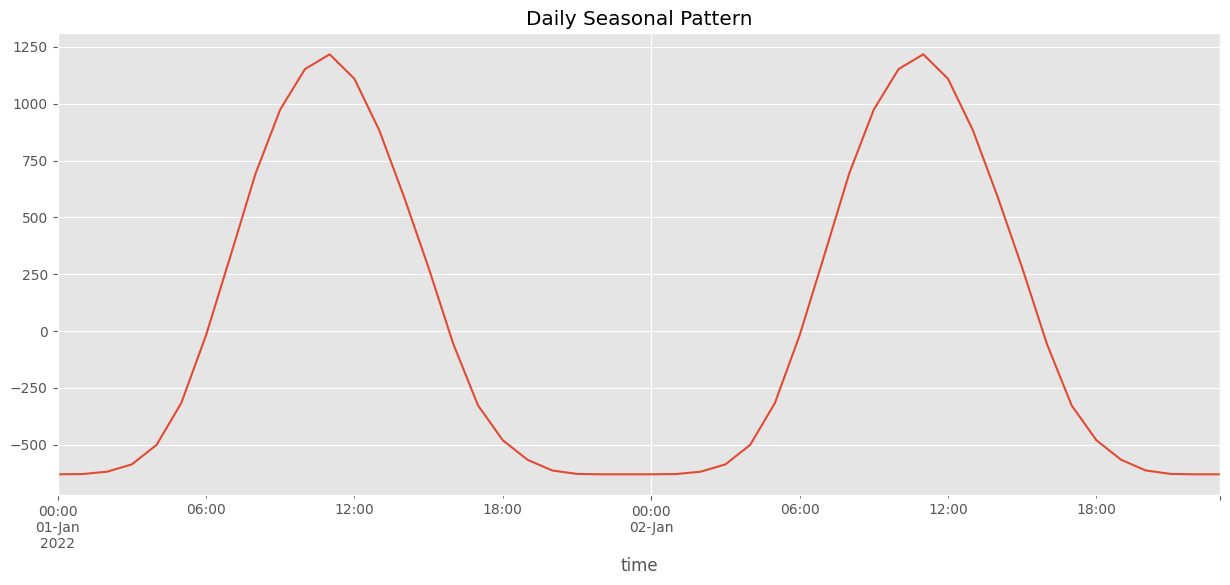

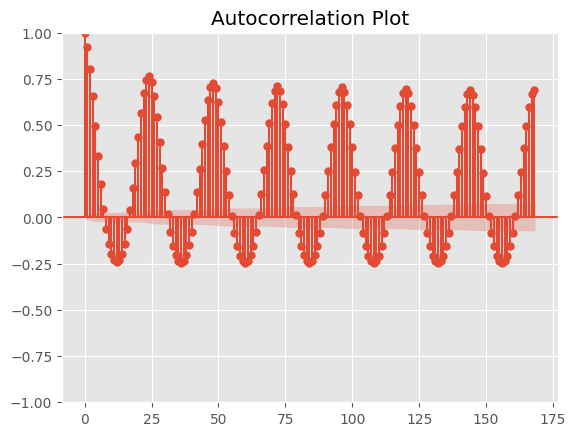

ValueError: This function does not handle missing values

In [13]:
from src.visualization.plotting import seasonal_trends

seasonal_trends(targets_A, title="Seasonal Trends for Location A", show=True)
seasonal_trends(targets_B, title="Seasonal Trends for Location B", show=True)
seasonal_trends(targets_C, title="Seasonal Trends for Location C", show=True)



## Cyclicity: 
Unlike seasonality, which happens at fixed known periods, cycles are fluctuations that are not of a fixed frequency.

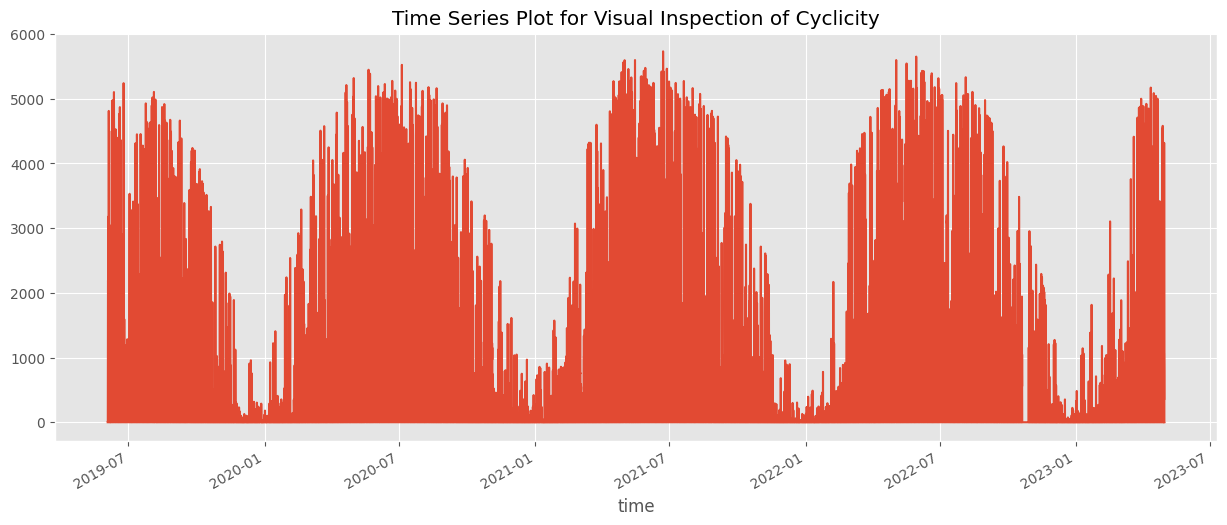

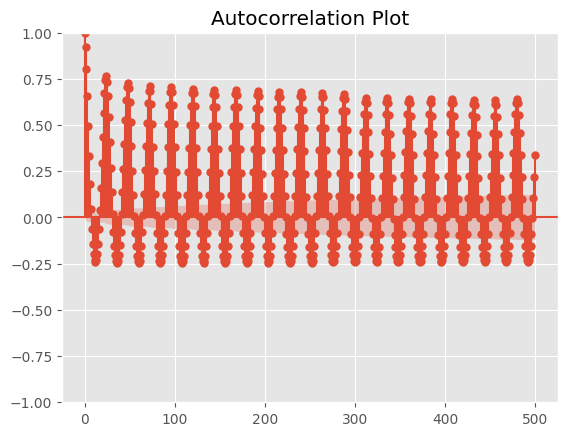

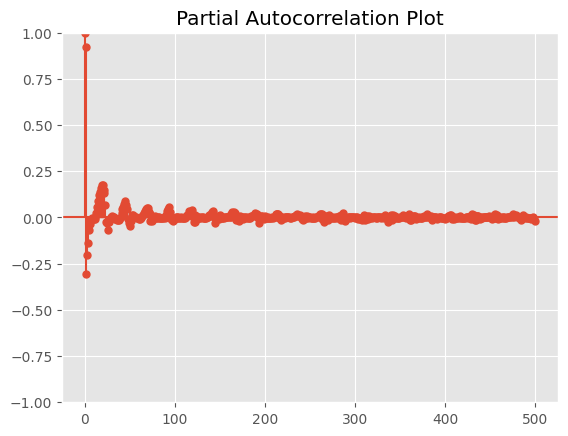

In [14]:
# Visual Inspection
plt.figure(figsize=(15,6))
targets_A['pv_measurement'].plot()
plt.title('Time Series Plot for Visual Inspection of Cyclicity')
plt.show()

# Autocorrelation plot
plot_acf(targets_A['pv_measurement'], lags=500)  # Adjust lags as needed to inspect longer periods
plt.title('Autocorrelation Plot')
plt.show()

# Partial autocorrelation plot
plot_pacf(targets_A['pv_measurement'], lags=500)  # Adjust lags as needed
plt.title('Partial Autocorrelation Plot')
plt.show()


## Autocorrelation: 
It measures the relationship between a variable's current value and its past values. A lag plot or an autocorrelation function (ACF) plot can help in understanding this.

<Figure size 1500x600 with 0 Axes>

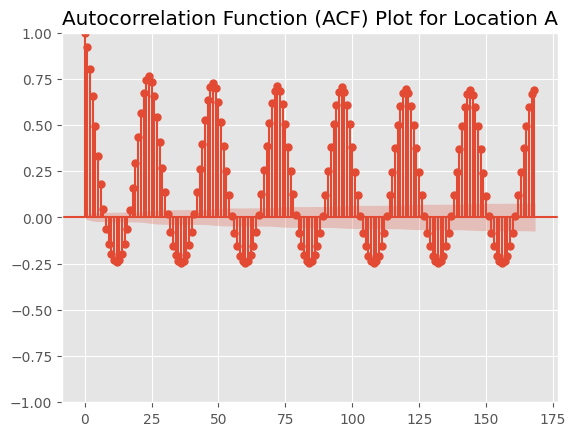

In [15]:
# Plot the Autocorrelation Function
plt.figure(figsize=(15,6))
plot_acf(targets_A['pv_measurement'], lags=168)  # 168 hours to check for weekly patterns
plt.title('Autocorrelation Function (ACF) Plot for Location A')
plt.show()


## Outlier Detection: 
Identifying unusual data points that might be errors or rare events. This can be done visually or with statistical methods.

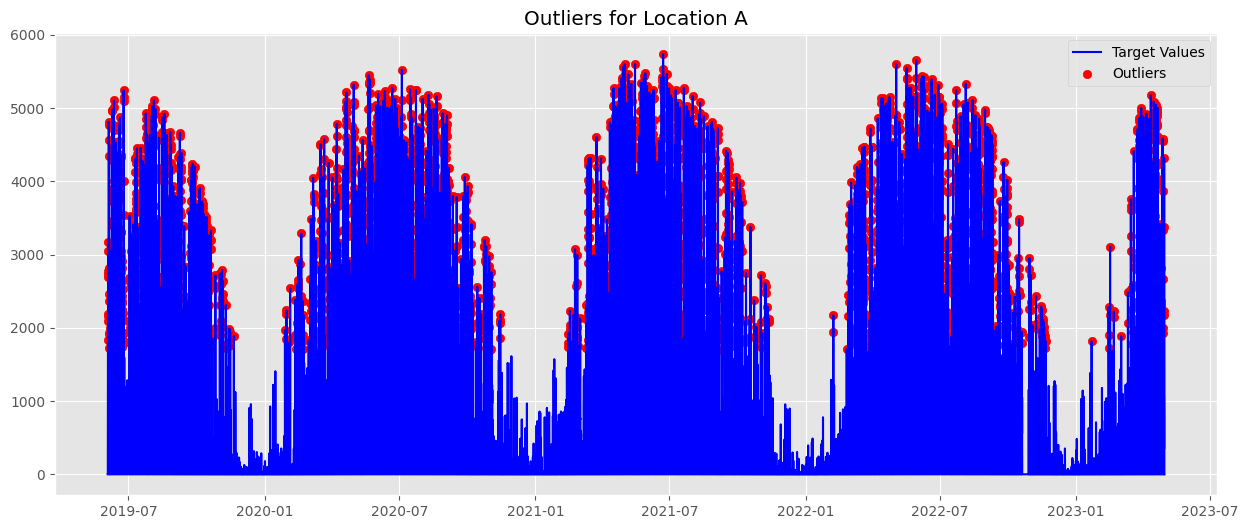

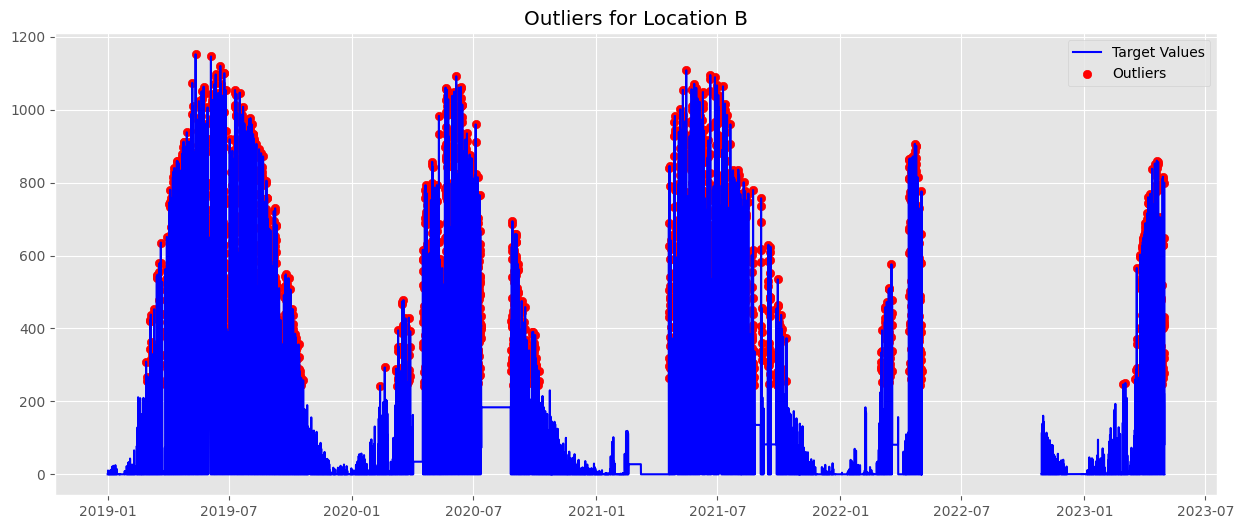

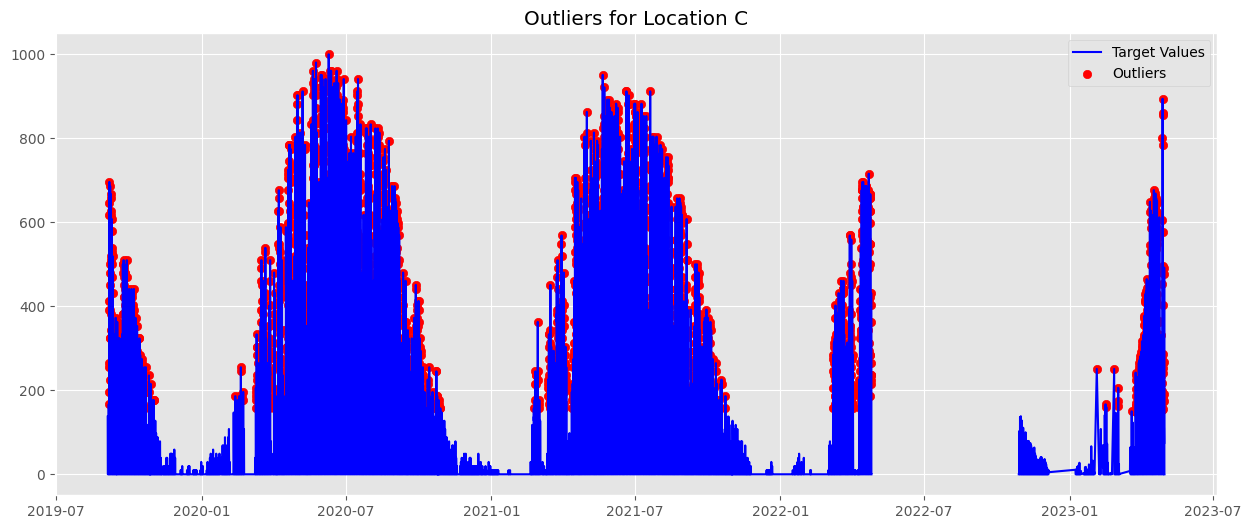

In [16]:

# Detect outliers
outliers_a = detect_outliers(targets_A['pv_measurement'], "Outliers for Location A")
outliers_b = detect_outliers(targets_B['pv_measurement'], "Outliers for Location B")
outliers_c = detect_outliers(targets_C['pv_measurement'], "Outliers for Location C")


## Distribution Analysis: 
Understanding the distribution of data can provide insights into its nature (e.g., normal vs. skewed, presence of heavy tails).

In [17]:
# Usage example:
# Load the dataset for Location A
stat, p = analyze_normality(targets_A['pv_measurement'])

# Print the test statistic and p-value
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-value: {p}")

# Anderson-Darling Test
# anderson_darling_test(targets_A['pv_measurement'])

Shapiro-Wilk Test: Data does not seem to be normally distributed (reject H0).
Shapiro-Wilk Test Statistic: 0.6119599342346191
P-value: 0.0


c:\Users\Bruker\OneDrive\NTNU semester 05\TDT4173 Maskinlæring\ml_power_predictor\venv\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


After executing the code, you'll receive the result of the Shapiro-Wilk test. If the test indicates non-normality, you can then consider other distributions like log-normal, exponential, or even more domain-specific distributions like the Weibull distribution (often used for lifespan analyses). The choice of distribution should also be influenced by domain knowledge and the nature of the data.

## Feature Importance: 
If using machine learning models, understanding which features (in this case, weather parameters) are most influential in predicting solar energy production.
Lasso Regression (L1 Regularization):
* Lasso regression can be used to perform feature selection by shrinking some coefficients to zero, effectively excluding them from the model. The features with non-zero coefficients are considered important.
Recursive Feature Elimination (RFE):
RFE is a method that fits the model multiple times on iteratively reduced sets of features. It ranks features based on when they were eliminated.
Permutation Feature Importance:
This method involves randomly shuffling individual features and measuring how much the model's performance deteriorates. Important features will result in a significant drop in model performance when they're shuffled.
Feature Importance from Gradient Boosted Trees:
Models like XGBoost, LightGBM, and CatBoost provide feature importance scores similar to random forests but based on the structure of the boosted trees.

* SHAP (SHapley Additive exPlanations):
  SHAP values provide a unified measure of feature importance by averaging the marginal contributions of features across all possible combinations. It is model-agnostic and provides insights into how features influence predictions for individual observations.
* Correlation Coefficients:
  Features that have a higher correlation with the target variable might be considered more important. However, this method doesn't account for interactions between features.
* ANOVA F-values (for regression tasks):
  The F-values from a one-way ANOVA test can be used to rank features based on their variance with respect to the target variable. Higher F-values indicate more significant differences in the means and, hence, potentially more important features.
* Chi-Squared Test (for classification tasks):
  For categorical input features and a categorical target, the chi-squared test can assess the independence between each feature and the target. Larger chi-squared statistics indicate more dependency and, thus, potentially more importance.
  
The method or combination of methods you choose depends on the specific requirements of the task, the nature of your data, and the model you're working with. It's also beneficial to cross-reference multiple methods to get a more robust understanding of feature importance.

Here we use Linear regression and Random Forest Regressor to find the feature importance.

In [18]:
# Load the datasets
features_A = X_train_estimated_a

# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_A, targets_A['pv_measurement'], test_size=0.2, random_state=42)

# 1. Feature Importance using Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
coefficients = lr.coef_

# Plotting feature importance for Linear Regression
plt.figure(figsize=(15,6))
plt.bar(X_train.columns, coefficients)
plt.xticks(rotation=45)
plt.title('Feature Importance using Linear Regression')
plt.show()

# 2. Feature Importance using Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_

# Plotting feature importance for Random Forest
plt.figure(figsize=(15,6))
plt.bar(X_train.columns, importances)
plt.xticks(rotation=45)
plt.title('Feature Importance using Random Forest')
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [17576, 34085]

## Residual Analysis: 
After fitting a model, analyzing the residuals (difference between predictions and actual values) can give insights into the model's accuracy and potential areas of improvement.

Residual analysis is an essential aspect of evaluating the performance and validity of a regression model. Residuals are the differences between the observed values and the values predicted by the model. Analyzing residuals helps in diagnosing the assumptions of linear regression, identifying outliers, and checking the fit of the model.

Here's a breakdown of the steps we'll take for residual analysis:

* Compute Residuals: We'll first fit a model (for this example, I'll use linear regression) to the data and compute the residuals.
* Residual Plots:
  * Residual vs. Fitted Plot: This plot helps in checking the assumption of linearity and equal variance (homoscedasticity). If there's a clear pattern or if the spread is not consistent, it indicates a problem.
  * Histogram and QQ-Plot: These plots help in checking the assumption of normally distributed residuals.
* Scale-Location Plot: Helps in checking the assumption of homoscedasticity.
* Residual vs. Leverage Plot: Helps in identifying influential cases that might be affecting the regression model disproportionately.

In [19]:


# Load the datasets
features_A = X_train_observed_a  # Adjust to your features file

# Fit the linear regression model
X = features_A
y = targets_A['pv_measurement']
X = sm.add_constant(X)  # Adding a constant to the model (intercept)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
residuals = y - predictions

# Residual vs. Fitted Plot
plt.figure(figsize=(10,6))
sns.residplot(x=predictions, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual vs. Fitted Plot')
plt.show()

# Histogram of residuals
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.show()

# QQ-Plot
qqplot(residuals, line='s')
plt.title('QQ-Plot')
plt.show()

# Scale-Location Plot
plt.figure(figsize=(10,6))
sns.regplot(x=predictions, y=np.sqrt(np.abs(residuals)), lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.ylabel('Standardized Residuals')
plt.xlabel('Fitted values')
plt.title('Scale-Location Plot')
plt.show()

# Residuals vs. Leverage Plot
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(10,6))
fig = plot_leverage_resid2(model, ax=ax)
plt.title('Residuals vs. Leverage Plot')
plt.show()


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

## Domain-Specific Insights: 
Since this data deals with solar energy production, domain knowledge about factors affecting solar panel efficiency, degradation over time, and other domain-specific considerations can be invaluable.


Here are some domain-specific insights related to solar energy:

Sunlight Intensity: Solar panel output is directly proportional to the sunlight's intensity. Hence, periods with more intense sunlight (e.g., mid-day) will typically have higher solar production.

Weather Conditions:

* Cloud Cover: Overcast days can significantly reduce solar panel output.
* Temperature: While sunlight is the primary driver of solar panel output, temperature can also play a role. Solar panel efficiency can decrease as temperature rises, meaning on very hot days, the panels might produce slightly less energy than on cooler sunny days.
* Rain and Snow: Rain can reduce solar panel efficiency by blocking sunlight. Snow, especially if it covers the panels, can halt production entirely.
* Seasonal Variations: Due to the tilt of the Earth's axis, the angle and duration of sunlight vary throughout the year. This leads to seasonal variations in solar production.

Solar Panel Degradation: Over time, solar panels degrade and become less efficient. Typically, solar panels degrade at a rate of about 0.5% to 1% per year. This means that the same panel will produce slightly less energy each year.

Orientation and Tilt of Solar Panels: The direction that solar panels face (often towards the equator) and their tilt can have a significant effect on their energy production.

Dirt and Debris: Dirt, dust, and other debris can accumulate on solar panels and reduce their efficiency. Regular cleaning can help maintain optimal production.

Shadowing: Shadows from nearby structures or trees can reduce solar panel output. Even a small amount of shade on a panel can reduce its output significantly.

System Issues: Technical issues, such as inverter problems, can reduce the efficiency of solar energy systems.

Policy and Grid Factors: Factors external to the physical system can also influence solar energy production data. For instance, if a grid is at capacity and cannot take on additional solar energy, solar installations might be curtailed.

Economic and Behavioral Factors: Economic incentives, such as feed-in tariffs, can influence the amount of solar energy fed into the grid. Similarly, energy storage solutions, like batteries, can influence when solar energy is used versus stored.

## Missing Data Analysis: 
Understanding if there are any missing data points, the reason for their absence, and deciding on strategies to handle them (e.g., interpolation, imputation).

c:\Users\Bruker\OneDrive\NTNU semester 05\TDT4173 Maskinlæring\ml_power_predictor\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Bruker\OneDrive\NTNU semester 05\TDT4173 Maskinlæring\ml_power_predictor\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Bruker\OneDrive\NTNU semester 05\TDT4173 Maskinlæring\ml_power_predictor\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


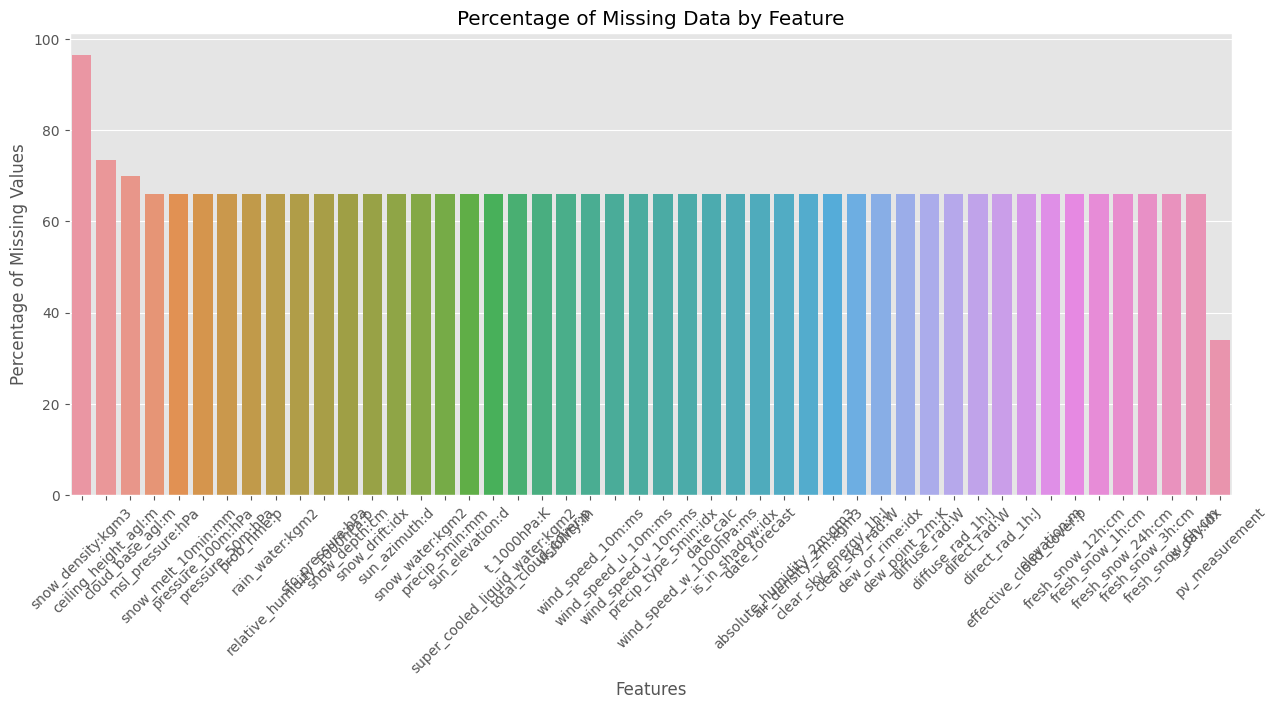

In [20]:
# Load the datasets for Location A
# targets_A = pd.read_csv('path_to_A_train_targets.csv')
# features_A = pd.read_csv('path_to_A_train_features.csv')  # Adjust to your features file
features_A = X_train_estimated_a
# Combine the targets and features into one DataFrame for analysis
data_A = pd.concat([targets_A, features_A], axis=1)

# Calculate the percentage of missing values for each column
missing_data = data_A.isnull().sum() / len(data_A) * 100
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

# Plotting the missing values
plt.figure(figsize=(15,6))
sns.barplot(x=missing_data.index, y=missing_data)
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Data by Feature')
plt.xticks(rotation=45)
plt.show()


## More data Exploration

In [ ]:
df = X_train_observed_a

dtest = train_a
dtest.shape
dtest.head(20)

# df.shape

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
df.dtypes
df["date_forecast"].dtype


In [ ]:
df.describe()

# Step 2: Data preperation
- Dropping irrelevant columns and rows
- Identifying duplicated columns
- Renaming Columns
- Feature Creation

In [ ]:
df[[
    'date_forecast', 'absolute_humidity_2m:gm3', 'air_density_2m:kgm3',
       'ceiling_height_agl:m', 'clear_sky_energy_1h:J', 'clear_sky_rad:W',
       'cloud_base_agl:m', 'dew_or_rime:idx', 'dew_point_2m:K',
       'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W', 'direct_rad_1h:J',
       'effective_cloud_cover:p', 'elevation:m', 'fresh_snow_12h:cm',
       'fresh_snow_1h:cm', 'fresh_snow_24h:cm', 'fresh_snow_3h:cm',
       'fresh_snow_6h:cm', 'is_day:idx', 'is_in_shadow:idx',
       'msl_pressure:hPa', 'precip_5min:mm', 'precip_type_5min:idx',
       'pressure_100m:hPa', 'pressure_50m:hPa', 'prob_rime:p',
       'rain_water:kgm2', 'relative_humidity_1000hPa:p', 'sfc_pressure:hPa',
       'snow_density:kgm3', 'snow_depth:cm', 'snow_drift:idx',
       'snow_melt_10min:mm', 'snow_water:kgm2', 'sun_azimuth:d',
       'sun_elevation:d', 'super_cooled_liquid_water:kgm2', 't_1000hPa:K',
       'total_cloud_cover:p', 'visibility:m', 'wind_speed_10m:ms',
       'wind_speed_u_10m:ms', 'wind_speed_v_10m:ms',
       'wind_speed_w_1000hPa:ms'
]]

In [ ]:
df.isna().sum()

In [ ]:
df.loc[df.duplicated(subset=["date_forecast"])]

Adding month column to dataset:

In [ ]:
df = create_time_features_from_date(df)


Adding season column


In [ ]:
df.head(100)

# Data types, ranges, missing values and outliers
There is much we do not know about the data. We need to find out more about it. We need to know the data types, ranges, missing values and outliers. We will use the describe function to get a summary of the data.

In [ ]:
train_a, train_b, train_c, X_train_estimated_a, X_train_estimated_b, X_train_estimated_c, X_train_observed_a, X_train_observed_b, X_train_observed_c, X_test_estimated_a, X_test_estimated_b, X_test_estimated_c = get_raw_data()
all_features = get_raw_data()

missing_a = X_train_estimated_a.isna().sum()
missing_b = X_train_estimated_b.isna().sum()
missing_c = X_train_estimated_c.isna().sum()
missing_a, missing_b, missing_c
